In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("pastel")

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Clean and Merge Data

In [2]:
df = pd.read_csv('rb_stats.csv')

# clean columns
df.columns = df.columns.str.lower()
df['player'] = df['player'].apply(lambda x: ' '.join(x.split()[:-1]))
df['firstName'] = df.player.str.split().str[0]
df['lastName'] = df.player.str.split().str[1]
df.yds = pd.to_numeric(df.yds.str.replace(',', ''))

df.head()

,rank,player,att,yds,y/a,lg,20+,td,rec,tgt,...,y/r,td.1,fl,g,fpts,fpts/g,own,year,firstName,lastName
0,1,Todd Gurley II,256,1251,4.9,36,12,17,59,81,...,9.8,4,1,14,313.1,22.4,0.1%,2018,Todd,Gurley
1,2,Saquon Barkley,261,1307,5.0,78,37,11,91,121,...,7.9,4,0,16,294.8,18.4,99.9%,2018,Saquon,Barkley
2,3,Christian McCaffrey,219,1098,5.0,59,15,7,107,124,...,8.1,6,1,16,278.5,17.4,100.0%,2018,Christian,McCaffrey
3,4,Alvin Kamara,194,883,4.6,49,3,14,81,105,...,8.8,4,0,15,273.2,18.2,95.5%,2018,Alvin,Kamara
4,5,Ezekiel Elliott,304,1434,4.7,41,15,6,77,95,...,7.4,3,1,15,252.1,16.8,70.2%,2018,Ezekiel,Elliott


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rank       1017 non-null   int64  
 1   player     1017 non-null   object 
 2   att        1017 non-null   int64  
 3   yds        1017 non-null   int64  
 4   y/a        1017 non-null   float64
 5   lg         1017 non-null   int64  
 6   20+        1017 non-null   int64  
 7   td         1017 non-null   int64  
 8   rec        1017 non-null   int64  
 9   tgt        1017 non-null   int64  
 10  yds.1      1017 non-null   object 
 11  y/r        1017 non-null   float64
 12  td.1       1017 non-null   int64  
 13  fl         1017 non-null   int64  
 14  g          1017 non-null   int64  
 15  fpts       1017 non-null   float64
 16  fpts/g     1017 non-null   float64
 17  own        1017 non-null   object 
 18  year       1017 non-null   int64  
 19  firstName  1017 non-null   object 
 20  lastName

In [4]:
df[(df.yds > 0) & (df.fpts == 0)]

,rank,player,att,yds,y/a,lg,20+,td,rec,tgt,...,y/r,td.1,fl,g,fpts,fpts/g,own,year,firstName,lastName
155,156,Cordarrelle Patterson,42,228,5.4,27,2,1,21,28,...,11.8,3,1,15,0.0,0.0,23.7%,2018,Cordarrelle,Patterson
327,154,Andrew Beck,1,3,3.0,3,0,0,9,12,...,10.0,1,0,16,0.0,0.0,0.0%,2019,Andrew,Beck
335,162,Cordarrelle Patterson,17,103,6.1,46,3,0,11,17,...,7.5,0,0,16,0.0,0.0,23.7%,2019,Cordarrelle,Patterson
533,165,John Lovett,3,6,2.0,4,0,0,0,0,...,0.0,0,0,8,0.0,0.0,0.0%,2020,John,Lovett
541,173,Nick Bellore,1,5,5.0,5,0,0,1,1,...,9.0,0,0,16,0.0,0.0,21.1%,2020,Nick,Bellore
543,175,Cordarrelle Patterson,64,232,3.6,13,0,1,21,25,...,6.3,0,0,16,0.0,0.0,23.7%,2020,Cordarrelle,Patterson
745,192,Jason Cabinda,3,23,7.7,21,1,0,4,7,...,4.0,1,0,10,0.0,0.0,0.1%,2021,Jason,Cabinda
992,243,Nick Bellore,1,3,3.0,3,0,0,0,0,...,0.0,0,0,12,0.0,0.0,21.1%,2022,Nick,Bellore
1011,262,Jason Cabinda,1,4,4.0,4,0,0,1,4,...,5.0,0,0,7,0.0,0.0,0.1%,2022,Jason,Cabinda


In [5]:
def clean_rush_file(df, year):
    new_df = df.copy()
    new_df.Player = new_df.Player.str.replace('[*+]', '', regex = True)
    new_df['firstName'] = new_df.Player.str.split().str[0]
    new_df['lastName'] = new_df.Player.str.split().str[1]
    new_df['year'] = year
    new_df = new_df[['Tm', 'Age', 'firstName', 'lastName', 'year']]
    
    return new_df

In [6]:
df_18 = pd.read_csv('rb_2018.txt')
df_clean_18 = clean_rush_file(df_18, 2018)

df_19 = pd.read_csv('rb_2019.txt')
df_clean_19 = clean_rush_file(df_19, 2019)

df_20 = pd.read_csv('rb_2020.txt')
df_clean_20 = clean_rush_file(df_20, 2020)

df_21 = pd.read_csv('rb_2021.txt')
df_clean_21 = clean_rush_file(df_21, 2021)

df_22 = pd.read_csv('rb_2022.txt')
df_clean_22 = clean_rush_file(df_22, 2022)

In [7]:
# concat and merge dataframes
df = df.copy()
df_combined = pd.concat([df_clean_18, df_clean_19, df_clean_20, df_clean_21, df_clean_22], ignore_index = True)
df_merged = pd.merge(df, df_combined, on = ['firstName', 'lastName', 'year'], how = 'inner')

# filter down to running backs who play
df_merged = df_merged[(df_merged.att > 50) & (df_merged.fpts > 0)]
df_merged.sort_values(by  = 'fpts', ascending = True).head()

,rank,player,att,yds,y/a,lg,20+,td,rec,tgt,...,fl,g,fpts,fpts/g,own,year,firstName,lastName,Tm,Age
554,103,Tony Jones Jr.,54,142,2.6,11,0,0,5,8,...,0,10,17.1,1.7,0.4%,2021,Tony,Jones,NOR,24
545,94,Royce Freeman,56,169,3.0,13,0,0,10,16,...,0,12,24.6,2.1,1.0%,2021,Royce,Freeman,2TM,25
232,83,Bilal Powell,59,229,3.9,17,0,0,7,12,...,0,14,26.2,1.9,0.0%,2019,Bilal,Powell,NYJ,31
543,91,Salvon Ahmed,54,149,2.8,16,0,0,12,19,...,0,11,26.6,2.4,0.1%,2021,Salvon,Ahmed,MIA,23
231,82,Mark Walton,53,201,3.8,19,0,0,15,21,...,1,7,27.0,3.9,2.0%,2019,Mark,Walton,MIA,22


In [8]:
df_pvt = df.pivot_table(index = ['firstName', 'lastName'], columns = 'year', values = 'fpts/g')
df_pvt.columns = ['fpts_2018', 'fpts_2019', 'fpts_2020', 'fpts_2021', 'fpts_2022']
df_pvt.reset_index(inplace = True)
df_pvt.head()

,firstName,lastName,fpts_2018,fpts_2019,fpts_2020,fpts_2021,fpts_2022
0,AJ,Dillon,NaN,NaN,3.5,8.9,8.2
1,Aaron,Jones,12.1,16.6,15.1,11.8,11.2
2,Adam,Prentice,NaN,NaN,NaN,0.4,0.3
3,Adrian,Killins,NaN,NaN,-1.0,NaN,NaN
4,Adrian,Peterson,10.6,8.1,7.0,5.7,NaN


In [9]:
df_fpts = pd.merge(df_merged, df_pvt, on = ['firstName', 'lastName'], how = 'left').fillna(0)
df_fpts.head()

,rank,player,att,yds,y/a,lg,20+,td,rec,tgt,...,year,firstName,lastName,Tm,Age,fpts_2018,fpts_2019,fpts_2020,fpts_2021,fpts_2022
0,1,Todd Gurley II,256,1251,4.9,36,12,17,59,81,...,2018,Todd,Gurley,LAR,24,22.4,12.6,9.2,0.0,0.0
1,2,Saquon Barkley,261,1307,5.0,78,37,11,91,121,...,2018,Saquon,Barkley,NYG,21,18.4,14.8,4.7,7.7,14.2
2,3,Christian McCaffrey,219,1098,5.0,59,15,7,107,124,...,2018,Christian,McCaffrey,CAR,22,17.4,22.2,24.5,12.9,16.0
3,4,Alvin Kamara,194,883,4.6,49,3,14,81,105,...,2018,Alvin,Kamara,NOR,23,18.2,12.0,19.7,14.4,10.3
4,5,Ezekiel Elliott,304,1434,4.7,41,15,6,77,95,...,2018,Ezekiel,Elliott,DAL,23,16.8,16.1,11.4,12.1,11.3


In [10]:
df_mid_18 = df_fpts[df_fpts.year == 2018]
df_mid_19 = df_fpts[df_fpts.year == 2019]
df_mid_20 = df_fpts[df_fpts.year == 2020]
df_mid_21 = df_fpts[df_fpts.year == 2021]
df_mid_22 = df_fpts[df_fpts.year == 2022]

In [11]:
df_mid_18 = df_mid_18[['player', 'Age', 'yds', 'y/a', 'td', 'rec', 'tgt', 'yds.1',
                      'y/r', 'td.1', 'g', 'fpts', 'fpts/g', 'year', 'fpts_2019']]
df_mid_18.rename(columns = {'fpts_2019': 'target_var'}, inplace = True)



df_mid_19 = df_mid_19[['player', 'Age', 'yds', 'y/a', 'td', 'rec', 'tgt', 'yds.1',
                      'y/r', 'td.1', 'g', 'fpts', 'fpts/g', 'year', 'fpts_2020']]
df_mid_19.rename(columns = {'fpts_2020': 'target_var'}, inplace = True)


df_mid_20 = df_mid_20[['player', 'Age', 'yds', 'y/a', 'td', 'rec', 'tgt', 'yds.1',
                      'y/r', 'td.1', 'g', 'fpts', 'fpts/g', 'year', 'fpts_2021']]
df_mid_20.rename(columns = {'fpts_2021': 'target_var'}, inplace = True)



df_mid_21 = df_mid_21[['player', 'Age', 'yds', 'y/a', 'td', 'rec', 'tgt', 'yds.1',
                      'y/r', 'td.1', 'g', 'fpts', 'fpts/g', 'year', 'fpts_2022']]
df_mid_21.rename(columns = {'fpts_2022': 'target_var'}, inplace = True)

df_mid_21

,player,Age,yds,y/a,td,rec,tgt,yds.1,y/r,td.1,g,fpts,fpts/g,year,target_var
213,Jonathan Taylor,22,1811,5.5,18,40,51,360,9.0,2,17,333.1,19.6,2021,9.9
214,Austin Ekeler,26,911,4.4,12,70,94,647,9.2,8,16,273.8,17.1,2021,15.6
215,Joe Mixon,25,1205,4.1,13,42,48,314,7.5,3,16,245.9,15.4,2021,12.0
216,Najee Harris,23,1200,3.9,7,74,94,467,6.3,3,17,226.7,13.3,2021,10.7
217,James Conner,26,752,3.7,15,37,39,375,10.1,3,15,220.7,14.7,2021,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,Carlos Hyde,31,253,3.5,1,12,22,65,5.4,0,12,33.8,2.8,2021,0.0
286,Craig Reynolds,25,230,4.2,0,7,8,52,7.4,0,5,28.2,5.6,2021,3.1
287,Salvon Ahmed,23,149,2.8,0,12,19,117,9.8,0,11,26.6,2.4,2021,1.9
288,Royce Freeman,25,169,3.0,0,10,16,77,7.7,0,12,24.6,2.1,2021,2.6


In [12]:
df_final = pd.concat([df_mid_18, df_mid_19, df_mid_20])
df_final.drop_duplicates(subset = 'player', inplace = True)
df_final = df_final[(df_final['fpts/g'] > 0) & (df_final.target_var > 0)]
df_final

,player,Age,yds,y/a,td,rec,tgt,yds.1,y/r,td.1,g,fpts,fpts/g,year,target_var
0,Todd Gurley II,24,1251,4.9,17,59,81,580,9.8,4,14,313.1,22.4,2018,12.6
1,Saquon Barkley,21,1307,5.0,11,91,121,721,7.9,4,16,294.8,18.4,2018,14.8
2,Christian McCaffrey,22,1098,5.0,7,107,124,867,8.1,6,16,278.5,17.4,2018,22.2
3,Alvin Kamara,23,883,4.6,14,81,105,709,8.8,4,15,273.2,18.2,2018,12.0
4,Ezekiel Elliott,23,1434,4.7,6,77,95,567,7.4,3,15,252.1,16.8,2018,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Joshua Kelley,23,354,3.2,2,23,23,148,6.4,0,14,58.2,4.2,2020,1.5
199,Salvon Ahmed,22,319,4.3,3,11,14,61,5.5,0,6,58.0,9.7,2020,2.4
201,Samaje Perine,25,301,4.8,3,11,12,66,6.0,0,16,54.7,3.4,2020,3.7
207,Justin Jackson,24,270,4.6,0,19,24,173,9.1,0,9,46.3,5.1,2020,4.6


# Data Exploration

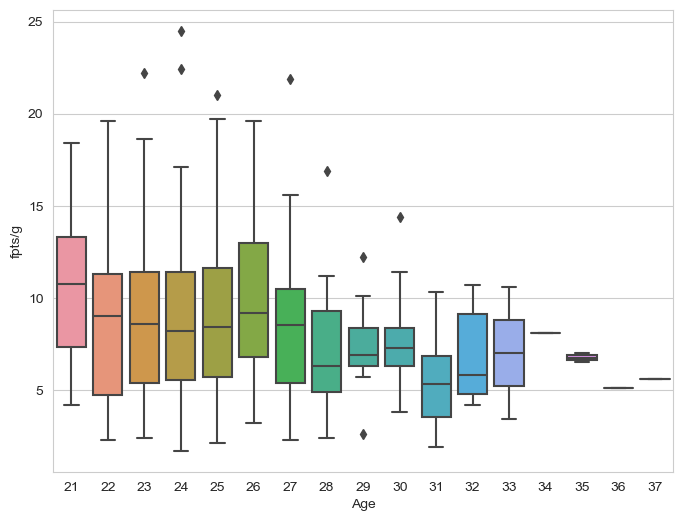

In [13]:
plt.figure(figsize = (8,6))
sns.boxplot(data = df_merged, x = 'Age', y = 'fpts/g')
plt.show()

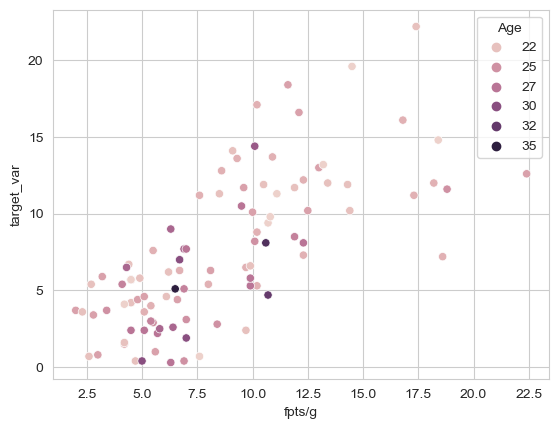

In [14]:
plt.figure()
sns.scatterplot(data = df_final, x = 'fpts/g', y = 'target_var', hue = 'Age')
plt.show()

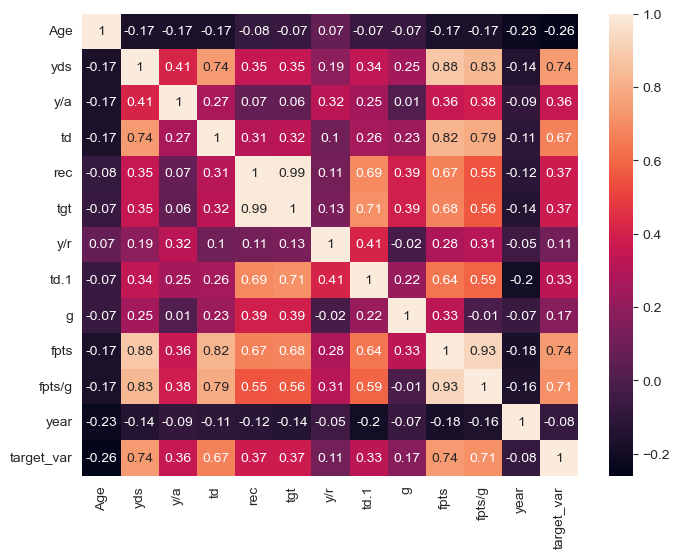

In [15]:
plt.figure(figsize = (8,6))
sns.heatmap(df_final.corr().round(2), annot = True)
plt.show()

# Modeling

## Linear Regression

In [16]:
predictors = ['Age', 'fpts/g']

X = df_final[predictors]
y = df_final['target_var']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

reg = LinearRegression()
reg.fit(X_scaled, y)

LinearRegression()

# Ridge Regression

In [17]:
X = df_final[predictors]
y = df_final['target_var']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ridge = Ridge(alpha = 5)
ridge.fit(X_scaled, y)

Ridge(alpha=5)

# PolynomialRegression

In [18]:
X = df_final[predictors]
y = df_final['target_var']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X_scaled)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

LinearRegression()

# Random Forest Regression

In [19]:
X = df_final[predictors]
y = df_final['target_var']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf = RandomForestRegressor(max_depth = 9)
rf.fit(X_scaled,y)

RandomForestRegressor(max_depth=9)

# Evaluation

In [20]:
df_pred = df_mid_21[['player', 'Age', 'fpts/g', 'target_var']].copy()
# age players by one year
df_pred.Age = df_pred.Age + 1


scaler = StandardScaler()
X_test = df_pred[predictors]
X_test_scaled = scaler.fit_transform(X_test)

X_test_poly = poly_features.fit_transform(X_test_scaled)

df_pred['LinPred'] = reg.predict(X_test_scaled)
df_pred['RidgePred'] = ridge.predict(X_test_scaled)
df_pred['PolyPred'] = poly_reg.predict(X_test_poly)
df_pred['RFPred'] = rf.predict(X_test_scaled)
df_pred

,player,Age,fpts/g,target_var,LinPred,RidgePred,PolyPred,RFPred
213,Jonathan Taylor,23,19.6,9.9,17.363082,16.919673,16.677592,13.410000
214,Austin Ekeler,27,17.1,15.6,14.215573,13.882858,12.191922,12.886929
215,Joe Mixon,26,15.4,12.0,13.125564,12.855552,12.528446,14.239845
216,Najee Harris,24,13.3,10.7,11.994987,11.799850,13.032447,12.872312
217,James Conner,27,14.7,11.9,12.278142,12.038719,11.501563,13.264679
...,...,...,...,...,...,...,...,...
285,Carlos Hyde,32,2.8,0.0,1.260023,1.500069,1.453927,2.978000
286,Craig Reynolds,26,5.6,3.1,5.214386,5.325320,5.076719,3.013168
287,Salvon Ahmed,24,2.4,1.9,3.195819,3.424387,1.364886,3.498907
288,Royce Freeman,26,2.1,2.6,2.388965,2.635951,0.600730,3.374946


In [21]:
lin_avg_error = mean_absolute_error(df_pred.target_var, df_pred.LinPred)
ridge_avg_error = mean_absolute_error(df_pred.target_var, df_pred.RidgePred)
poly_avg_error = mean_absolute_error(df_pred.target_var, df_pred.PolyPred)
rf_avg_error = mean_absolute_error(df_pred.target_var, df_pred.RFPred)

pd.DataFrame(data = [lin_avg_error, ridge_avg_error, poly_avg_error, rf_avg_error],
             index = ['Linear Regression', 'Ridge Regression', 'Polynomial Regression', 'Random Forest Regression'], 
             columns = ['Average Error'])

,Average Error
Linear Regression,2.814260
Ridge Regression,2.813469
Polynomial Regression,3.154119
Random Forest Regression,3.329854
